# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *Your group letter.*

**Names:**

* *Name 1*
* *Name 2*
* *Name 3*

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [2]:
#imports
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import collections
import numpy as np

In [3]:

def load_data(file_name, comment, is_header):
    network = pd.read_csv(f'../data/{file_name}', comment = comment, header = is_header)
    network.columns = ['fromNode', 'toNode']
    return network

In [4]:
network1 = load_data('network1.csv', '#', None)
network1.head()

,fromNode,toNode
0,0,11932
1,1,5128
2,2,7008
3,3,10476
4,4,9671


#### Exercise 2.2:  Node degree distribution

In [5]:
def create_graph(network):
    G = nx.Graph()
    G = nx.from_pandas_edgelist(network, 'fromNode', 'toNode')
    return G

In [6]:
G = create_graph(network1)

In [7]:
def graph_info(graph):
    num_edges = G.number_of_edges()
    num_nodes = G.number_of_nodes()
    return f'num of edges: {num_edges}, num of nodes: {num_nodes}'

In [8]:
graph_info(G)

'num of edges: 18584, num of nodes: 13033'

In [9]:
def get_degrees_count(G):
    degree_sequence = sorted((val for (node, val) in G.degree()), reverse=False)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    return deg, cnt

def display_degree_freq(G):
    deg, cnt = get_degrees_count(G)

    fig, ax = plt.subplots(ncols=1, figsize=(16, 4))
    plt.plot(np.log(deg), np.log(cnt), color='crimson', marker='.', zorder=2)
    ax.set_ylabel('degree frequency')
    ax.set_xlabel('degree')
    return plt

<module 'matplotlib.pyplot' from 'c:\\Users\\nephe\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

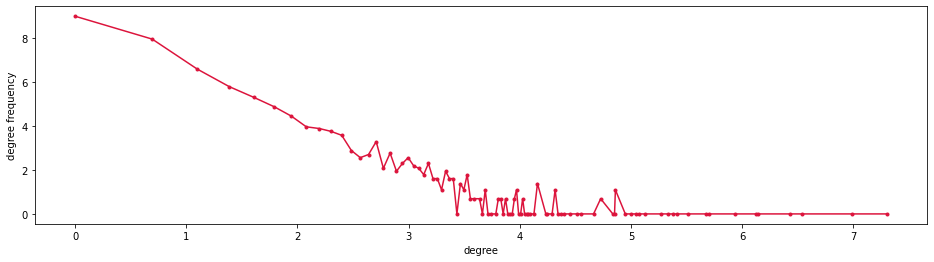

In [10]:
display_degree_freq(G)

1. What kind of plot do you think is useful for this task?
**It could be a histogram, scatter or bar graph. It should show how frequent degrees appears in the dataset.**

2. Can you list some of the properties of the degree distribution?
**An important graph property is the degree distribution function P (k), that describes the probability to find a node with k edges**

3. Is it close to a well-known probability distribution? If so, provide an estimation of its
parameter(s)?
**Probably it looks a little bit like a power-law distribution**
**A scale-free graph is instead characterized by a power-law degree distribution P (k) = Ak −γ , usually with 2 < γ < 3. A power-law distribution appears as a straight line in a double-logarithmic plot. In a scale-free graph, low degree nodes are the most frequent ones, but there are also a few highly connected nodes, usually called hubs.**

In [11]:

#draw the graph
#def draw_graph(G):
    #nx.draw(G)

#### Exercise 2.3: Giant component

In [12]:
def calc_connected_components_num(G):
    return nx.number_connected_components(G)

In [13]:
calc_connected_components_num(G)

192

In [14]:
def is_giant_component(G):
    deg, cnt = get_degrees_count(G)
    np_cnt = np.array(cnt)
    np_deg = np.array(deg)
    c = sum(np_cnt * np_deg) / len(G)
    print(f'average graph degree: {c}')
    return c > 1

def giant_component_info(G):
    if is_giant_component(G):
        Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
        G0 = G.subgraph(Gcc[0])
        print(G0)
    else:
        print("There is no giant component")

In [15]:
giant_component_info(G)

average graph degree: 2.8518376429064682
Graph with 12576 nodes and 18317 edges


#### Exercise 2.4: Short paths & Small-worlds

In [16]:
def get_avg_paths_length(G):
    avg_length = []
    for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
        avg_length.append(nx.average_shortest_path_length(C))
    return sum(avg_length) / len(avg_length)

In [17]:
#average length of connection between every two nodes in graph
get_avg_paths_length(G)

1.1072818079387936

In [18]:
def get_shortest_paths(G):
    shortest_paths = list(nx.shortest_path_length(G))
    paths_list = []
    for node in shortest_paths:
        temp = [value for value in node[1].values()]
        paths_list.extend(temp)
    return paths_list

In [19]:
paths_list = get_shortest_paths(G)

In [20]:
def display_shortest_paths_dist(paths_list):
    degreeCount = collections.Counter(paths_list)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots(ncols=1, figsize=(16, 4))
    ax.bar(deg, cnt)
    ax.set_ylabel('count')
    ax.set_xlabel('shortest path length')
    return plt
    #plt.show()

<module 'matplotlib.pyplot' from 'c:\\Users\\nephe\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

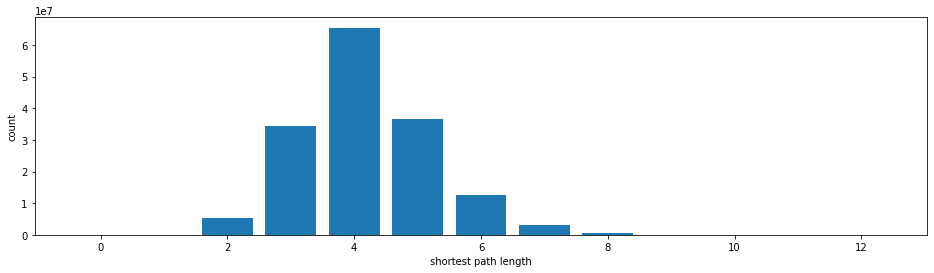

In [21]:
display_shortest_paths_dist(paths_list)

In [22]:
def reachable_r(r, paths_list):
    how_many = 0
    reachable = [1 for node in paths_list if node <=r]
    print(sum(reachable))
    print(len(paths_list))
    return (sum(reachable) / len(paths_list)) * 100

In [23]:
r = 2
reachable_r(r, paths_list)

5469553
158157161


3.458302466620528

In [24]:
r = 6
reachable_r(r, paths_list)

154511017
158157161


97.69460707504733

In [25]:
r = 10
reachable_r(r, paths_list)

158156361
158157161


99.99949417402605

#### Exercise 2.5: Network comparison

In [26]:
network2 = load_data('network2.csv', '#', None)
network2.head()

,fromNode,toNode
0,135627,135630
1,135627,135623
2,135627,135625
3,135627,135626
4,137038,137040


**Properties of previous network**

In [27]:
#create the graph of second network
G2 = create_graph(network2)

In [28]:
#calc num of edges and nodes in the graph
graph_info(G2)

'num of edges: 18584, num of nodes: 13033'

<module 'matplotlib.pyplot' from 'c:\\Users\\nephe\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

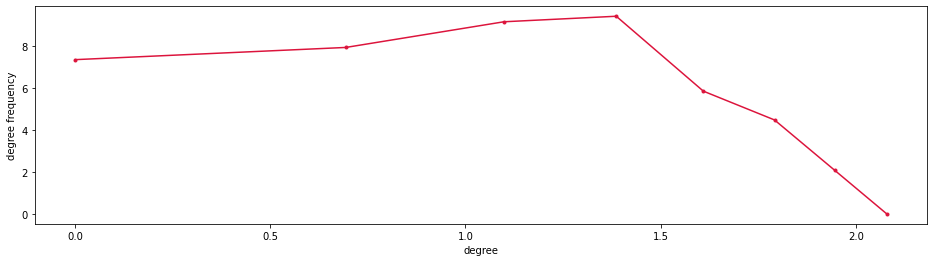

In [29]:
# distribution of degrees in the network
display_degree_freq(G2)

In [30]:
#draw the graph
#draw_graph(G2)

In [31]:
#number of connected components in graph
calc_connected_components_num(G2)

5

In [32]:
#find giant component and show its properties if it exists
giant_component_info(G2)

average graph degree: 3.2790294627383014
Graph with 26481 nodes and 43437 edges


In [33]:
#average length of connection between every two nodes in graph
get_avg_paths_length(G2)

KeyboardInterrupt: 

In [34]:
paths_list = get_shortest_paths(G2)
display_shortest_paths_dist(paths_list)

KeyboardInterrupt: 

In [ ]:
r = 2
reachable_r(r, paths_list)

In [ ]:
r = 6
reachable_r(r, paths_list)

In [ ]:
r = 10
reachable_r(r, paths_list)

#### Exercise 2.6: Network identification

I suppose network1 is the network of roads around the city of New-York, most of nodes can be achived within path which is not longer than 6 nodes. So another one is the network of internet, it shows that not many of routers are accesible by wire, eventhough there are much more edges then in network1.